In [1]:
%load_ext autoreload
%autoreload 2

# PyDRC

This document is intended as a guide to the **pyDRC**, a Python API for DRC software calls. 

**DRC** stands for Double Route Cascaded, a **computational model for reading aloud**. Its simulator software can be downloaded at this [link](https://maxcoltheart.wordpress.com/drc/). Its interface is based on terminal commands and local text files manipulation.

**pyDRC** purpose is to simplify some tedious interaction with the terminal and the diverse input attributes by mediating between the terminal command line interface and output manipulation through a simple function call.

## Software download

The class `DRCDownloader` downloads and extracts the software in the project working directory, selecting the appropriate version to the OS. 

In case of issues with the downloading through the class you can download it manually and locate in the directory.

In [2]:
from settings import DRC_DIR, URL
from io_ import DRCDownloader
from os import path

downloader = DRCDownloader(
    path_=DRC_DIR,
    url=URL
)

downloader

DRCDownloader[path: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc; url: https://maxcoltheart.files.wordpress.com/2019/05/drc-win.zip;  downloaded]

In [3]:
downloader.download(overwrite=False)

File already downloaded at C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc


### Network instance

The class `DRCNetwork` and its method `run` are the core of the implementation. It allows to create an instance of the model specifying its root directory and the name of the binary file.

In [4]:
from settings import BINARY
from model import DRCNetwork

print(f"DRC directory: {DRC_DIR}")
print(f"DRC binary name: {BINARY}")

DRC directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc
DRC binary name: drc


In [5]:
drc = DRCNetwork(
    dir_=DRC_DIR,
    binary=BINARY
)

In [6]:
drc

DRCNetwork[C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\drc]

The `clear` method offers the possibility to clear previous data history.

In [7]:
drc.clear()

Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\fetch.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\irregular-1.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\irregular.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\regular-1.drc
Removed directory: C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\regular.drc


## Network calls

This is followed by a series of function calls collecting all the software basic commands. Each one explains the set of parameters, their format and their output.

### Simple call

**Command**: `./drc --nofiles fetch`

The simple command uses the arguments:
- `word`, string representing the experiment word;
- `files`, a boolean corresponding to the flag `--nofiles`, indicating if to generate a local file collecting the result of the processing (default to False);
- `log`, a boolean indicating if to print terminal log; it doesn't affect the computation (default to False).

In [8]:
result_a = drc.run(
    word='fetch',
    files=False,
    log=True
)

Running: ./drc --nofiles fetch
DRC 1.2.3
Searching for language 'english-1.1.8.1'...
Trying 'english-1.1.8.1'...nope
Trying 'Languages\english-1.1.8.1'...ok
Language: Australian English
- Version: 1.1.8.1
- Date: 16 April, 2014
- Created by: Unknown
- Letters: 27 Visual Features: 14 Phonemes: 45 Stress Types: 0
- Orthographic Lexicon entries: 7966 (skipped 10 that were too large)
- Phonological Lexicon entries: 7119 (using COMBINED entries for homophones)
- Multi-Letter rules: 68 Context-Sensitive rules: 27 Two-Letter rules: 93
- One-To-Multi rules: 2 Single-Letter rules: 38 Output rules: 8
- Body rules: 1797 Stress rules: 0
Settings:
- Visual Feature and Letter Layer units: 8 Phoneme Layer: 8
Results:
fetch fEJ 71 NAMED CORRECT


The function returns an object.

In [9]:
result_a

[fetch: fEJ - NAMED CORRECT; cycles: 71]

The object as a specific type `Result`.

In [10]:
type(result_a)

model.Result

Specifically we can access individually each of its four attributes, for example its pronounce.

In [11]:
result_a.pronounce

'fEJ'

The four attributes are: `word`, `pronounce`, `cycles` and `named`.

In [12]:
print(f"Word:      {result_a.word}")
print(f"Pronounce: {result_a.pronounce}")
print(f"Cycles:    {result_a.cycles}")
print(f"Named:     {result_a.named}")

Word:      fetch
Pronounce: fEJ
Cycles:    71
Named:     NAMED CORRECT


The last attribute, named, has its own specif `Named` type.

In [13]:
type(result_a.named)

<enum 'Named'>

The `Named` type can take three possible outcomes.

In [14]:
from model import Named

for named in Named:
    print(named)

NAMED CORRECT
NAMED WRONG
LOWAC WRONG


### Setting attributes

**Command**: `./drc –P ActivationRate .10 fetch`

In [15]:
from model import Parameter
from settings import DEFAULT_PARAMETER_PATH

Parameter.DEFAULT_PARAMETER_PATH.set_default_parameter_path(new_path=DEFAULT_PARAMETER_PATH)

The function offers the possibility of altering model parameters through the `parameters` argument. All possible parameters are enumerated in the Parameter class.

In [16]:
print("Parameters: ")
for param_name in Parameter:
    print(f"- {param_name}")

Parameters: 
- 
- ActivationRate
- FrequencyScale
- MinReadingPhonology
- FeatureLetterExcitation
- FeatureLetterInhibition
- LetterOrthlexExcitation
- LetterOrthlexInhibition
- LetterLateralInhibition
- OrthlexPhonlexExcitation
- OrthlexPhonlexInhibition
- OrthlexLetterExcitation
- OrthlexLetterInhibition
- OrthlexLateralInhibition
- PhonlexPhonemeExcitation
- PhonlexPhonemeInhibition
- PhonlexOrthlexExcitation
- PhonlexOrthlexInhibition
- PhonlexLateralInhibition
- PhonemePhonlexExcitation
- PhonemePhonlexInhibition
- PhonemeLateralInhibition
- PhonemeUnsupportedDecay
- GPCPhonemeExcitation
- GPCCriticalPhonology
- GPCOnset


For each parameter we can also access its default parameter with the `default` attribute.

In [17]:
Parameter.ActivationRate.default

0.2

The parameter model can be set providing a list of tuples *(Parameter, NewValue)*.

In [18]:
result_b = drc.run(
    word='fetch',
    parameters=[(Parameter.ActivationRate, .10)]
)

Running: ./drc --nofiles -P ActivationRate 0.1 fetch


In [19]:
result_b

[fetch: fEJ - NAMED CORRECT; cycles: 139]

### Setting range attributes 

**Command**: `./drc –S ActivationRate .10 .20 5 fetch`

The step parameter uses the same format requiring a list of tuples *(Parameter, Value)*. To trigger the step computation it's sufficient to specify a triple *(Start, End, Step)* instead of the scalar value.

In [20]:
result_c = drc.run(
    word='fetch',
    parameters=[(Parameter.ActivationRate, (.10, .20, 5))]
)

Running: ./drc --nofiles -S ActivationRate 0.1 0.2 5 fetch


The model return a new object of type `Results` which is a collection of results.

In [21]:
type(result_c)

model.Results

In [22]:
result_c

Results[fetch - ActivationRate: {from: 0.1, to: 0.2, step: 5}]

The object has the attribute `results`, a dictionary mapping each parameter value to a single result.

In [23]:
result_c.results

{0.1: [fetch: fEJ - NAMED CORRECT; cycles: 139],
 0.125: [fetch: fEJ - NAMED CORRECT; cycles: 112],
 0.15: [fetch: fEJ - NAMED CORRECT; cycles: 94],
 0.175: [fetch: fEJ - NAMED CORRECT; cycles: 81],
 0.2: [fetch: fEJ - NAMED CORRECT; cycles: 71]}

For example we can access the result for a single parameter value.

In [24]:
result_c.results[0.175]

[fetch: fEJ - NAMED CORRECT; cycles: 81]

In [25]:
result_c.results[0.175].cycles

81

The object offers a visualization tool `plot_cycles()` that plots the number of cycles and a function of the parameter function, along with its pronunciation and the color specifying the final readout.

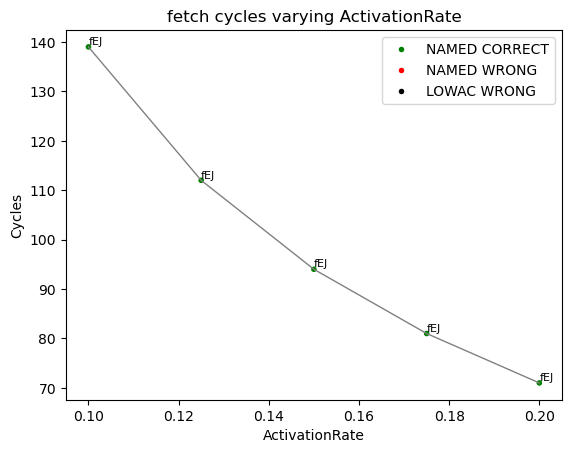

In [26]:
result_c.plot_cycles()

### Parameter File

**Command**: `./drc -p new.parameters fetch`

The `Parameter` class also offer the possibility to read a set of parameters from a file. Let's consider the `new.parameter` file.

In [27]:
path.join(DRC_DIR, 'new.parameters')

'C:\\Users\\user.LAPTOP-G27BJ7JO\\Desktop\\SISSA\\CREPALDI\\assignment2\\drc\\new.parameters'

The function `get_parameter_file_settings()` requires the file path and returns a dictionary mapping each parameter to its specified value.

In [28]:
from os import path

Parameter.get_parameter_file_settings(
    parameter_file=path.join(DRC_DIR, 'new.parameters')
)

{ActivationRate: 0.2,
 FrequencyScale: 0.05,
 MinReadingPhonology: 0.4,
 FeatureLetterExcitation: 0.005,
 FeatureLetterInhibition: 0.15,
 LetterOrthlexExcitation: 0.07,
 LetterOrthlexInhibition: 0.3,
 LetterLateralInhibition: 0.0,
 OrthlexPhonlexExcitation: 0.25,
 OrthlexPhonlexInhibition: 0.0,
 OrthlexLetterExcitation: 0.15,
 OrthlexLetterInhibition: 0.0,
 OrthlexLateralInhibition: 0.12,
 PhonlexPhonemeExcitation: 0.09,
 PhonlexPhonemeInhibition: 0.0,
 PhonlexOrthlexExcitation: 0.25,
 PhonlexOrthlexInhibition: 0.0,
 PhonlexLateralInhibition: 0.07,
 PhonemePhonlexExcitation: 0.04,
 PhonemePhonlexInhibition: 0.16,
 PhonemeLateralInhibition: 0.147,
 PhonemeUnsupportedDecay: 0.05,
 GPCPhonemeExcitation: 0.051,
 GPCCriticalPhonology: 0.05,
 GPCOnset: 26.0}

To employ the set of values in the model it is sufficient to specify the name of the file as a string to the `parameters` attribute.

In [29]:
result_d = drc.run(
    word='fetch',
    parameters='new.parameters'
)

Running: ./drc --nofiles -p new.parameters fetch


In [30]:
result_d

[fetch: fEJ - NAMED CORRECT; cycles: 73]

### Store activation

**Command**: `./drc -a fetch`

To store activation function is suffices to specify use the boolean argument `store_activations` set to True. In this case the function returns a tuple containing both the result and an `Activations` object.

In [31]:
result_e, activations = drc.run(
    word='fetch',
    store_activations=True
)

Running: ./drc -a fetch


In [32]:
result_e

[fetch: fEJ - NAMED CORRECT; cycles: 71]

The Activations object is a specific task with reference to the directory created by the computation.

In [35]:
activations

Activations[C:\Users\user.LAPTOP-G27BJ7JO\Desktop\SISSA\CREPALDI\assignment2\drc\fetch.drc - 1 file]

The object contains the list of all possible activations files.

In [36]:
activations.file_names

['fetch.acts']

We can get activations data by specifying the `file_name` argument in the `get_data()` method.

In [37]:
activations.get_data(file_name="fetch.acts")

{'TL': [0.112,
  0.222432,
  0.331318,
  0.438679,
  0.544538,
  0.64896,
  0.752618,
  0.856137,
  0.960096,
  1.065032,
  1.171436,
  1.279761,
  1.390415,
  1.503764,
  1.620129,
  1.73978,
  1.862944,
  1.989792,
  2.120442,
  2.254956,
  2.393337,
  2.53553,
  2.681417,
  2.830832,
  2.98356,
  3.139335,
  3.297841,
  3.458714,
  3.621542,
  3.78587,
  3.951208,
  4.117032,
  4.282794,
  4.447934,
  4.611881,
  4.774071,
  4.933952,
  5.090996,
  5.244706,
  5.394622,
  5.540333,
  5.681477,
  5.817746,
  5.94889,
  6.074715,
  6.19508,
  6.309904,
  6.419151,
  6.522834,
  6.621006,
  6.713761,
  6.801219,
  6.883531,
  6.960868,
  7.033417,
  7.101376,
  7.164956,
  7.224366,
  7.279824,
  7.331542,
  7.379733,
  7.424602,
  7.466348,
  7.505169,
  7.541248,
  7.574764,
  7.605885,
  7.634772,
  7.661576,
  7.686444,
  7.709507],
 'TGPC': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.372945,
  0.39

We can also plot the activations using the `plot()` function specying the file name.

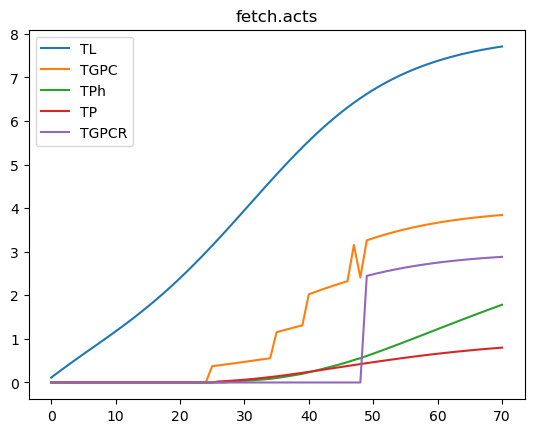

In [38]:
activations.plot(file_name="fetch.acts")

### Words form text

**Command**: `./drc -b regularHighFrequency.txt`

To specify multiple words from a test it is sufficient to pass the name of the file to the `word` , the TXT extension will trigger the different behaviour.

In [39]:
result_f = drc.run(
    word="regularHighFrequency.txt",
    log=True    
)

Running: ./drc --nofiles -b regularHighFrequency.txt
DRC 1.2.3
Searching for language 'english-1.1.8.1'...
Trying 'english-1.1.8.1'...nope
Trying 'Languages\english-1.1.8.1'...ok
Language: Australian English
- Version: 1.1.8.1
- Date: 16 April, 2014
- Created by: Unknown
- Letters: 27 Visual Features: 14 Phonemes: 45 Stress Types: 0
- Orthographic Lexicon entries: 7966 (skipped 10 that were too large)
- Phonological Lexicon entries: 7119 (using COMBINED entries for homophones)
- Multi-Letter rules: 68 Context-Sensitive rules: 27 Two-Letter rules: 93
- One-To-Multi rules: 2 Single-Letter rules: 38 Output rules: 8
- Body rules: 1797 Stress rules: 0
Settings:
- Visual Feature and Letter Layer units: 8 Phoneme Layer: 8
Results:
best bEst 64 NAMED CORRECT
book bUk 86 NAMED CORRECT
came k1m 66 NAMED CORRECT
dark d#k 68 NAMED CORRECT
deep dip 68 NAMED CORRECT
flat fl{t 66 NAMED CORRECT
game g1m 68 NAMED CORRECT
gain g1n 68 NAMED CORRECT
high h2 67 NAMED CORRECT
more m9 63 NAMED CORRECT
miss m

This type of computation returns a dictionary mapping each word in the input list to its result.

In [40]:
result_f

{'best': [best: bEst - NAMED CORRECT; cycles: 64],
 'book': [book: bUk - NAMED CORRECT; cycles: 86],
 'came': [came: k1m - NAMED CORRECT; cycles: 66],
 'dark': [dark: d#k - NAMED CORRECT; cycles: 68],
 'deep': [deep: dip - NAMED CORRECT; cycles: 68],
 'flat': [flat: fl{t - NAMED CORRECT; cycles: 66],
 'game': [game: g1m - NAMED CORRECT; cycles: 68],
 'gain': [gain: g1n - NAMED CORRECT; cycles: 68],
 'high': [high: h2 - NAMED CORRECT; cycles: 67],
 'more': [more: m9 - NAMED CORRECT; cycles: 63],
 'miss': [miss: mIs - NAMED CORRECT; cycles: 68],
 'same': [same: s1m - NAMED CORRECT; cycles: 65],
 'seem': [seem: sim - NAMED CORRECT; cycles: 66],
 'soon': [soon: sun - NAMED CORRECT; cycles: 67],
 'train': [train: tr1n - NAMED CORRECT; cycles: 67],
 'wall': [wall: w9l - NAMED CORRECT; cycles: 95],
 'wage': [wage: w1_ - NAMED CORRECT; cycles: 70],
 'well': [well: wEl - NAMED CORRECT; cycles: 62],
 'west': [west: wEst - NAMED CORRECT; cycles: 67],
 'week': [week: wik - NAMED CORRECT; cycles: 6

For example we can access the result of a specific word.

In [41]:
result_f['miss']

[miss: mIs - NAMED CORRECT; cycles: 68]

In [42]:
result_f['miss'].cycles

68